In [31]:
import os
import torch
import cheetah 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import torch.nn as nn
import warnings
warnings.simplefilter("ignore", FutureWarning)

## Get lattice from Bmad into Cheetah

#### Load lattice from bmad

In [32]:
# cu_hxr_file_path = (
#     Path("$LCLS_LATTICE") / "bmad" / "models" / "cu_hxr" / "cu_hxr.lat.bmad"
# )
BEAMPATH = "cu_hxr/cu_hxr.lat.bmad"
cu_hxr_file_path = f'/sdf/home/j/jmorgan/beamphysics/lcls-lattice/bmad/models/{BEAMPATH}'

cu_hxr_file_path = f'/sdf/home/j/jmorgan/beamphysics/lcls-lattice/bmad/models/{BEAMPATH}'
lcls_lattice_dir = '/sdf/home/j/jmorgan/beamphysics/lcls-lattice' #os.environ["LCLS_LATTICE"]
lcls_cu_segment = (
    cheetah.Segment.from_bmad(
    str(cu_hxr_file_path),
    environment_variables={"LCLS_LATTICE": lcls_lattice_dir},
    
))

#lcls_lattice_dir

In [33]:
lcls_cu_segment = lcls_cu_segment.flattened()
len(lcls_cu_segment.elements)


2267

## Bmad

In [34]:
from pytao import Tao
import pandas as pd
from util_bmad import tc, get_output, print_twiss

In [35]:
def tc(cmd, verbose: bool = False):
    result = tao.cmd(cmd)
    if verbose:
        for l in result:
            print(l)

In [36]:
#track_start_element_name = 'begl3'#'endl1'#'beginning'#'begltuh' #'begbsyh_1' #'begl3'

track_start_element_name = 'begltuh'

track_end_element_name = 'endltuh' #'endltuh'#'end' #'endclth_0'

In [40]:
#CU_HXR model
BEAMPATH = 'cu_hxr'
OPTIONS = f'-slice {track_start_element_name}:{track_end_element_name} -noplot '
# OPTIONS = f'-slice {track_start_element_name}: -noplot '
INIT = f'-init $LCLS_LATTICE/bmad/models/{BEAMPATH}/tao.init {OPTIONS}'
tao = Tao(INIT)
#tc('set ele  *::BEGUNDH:ENDUNDH  field_master=True') #QHXHs
# tc('set ele BEGINNING:END field_master=True')

bmad_output = get_output(tao)

RuntimeError: Command: reinit tao -clear -init '$LCLS_LATTICE/bmad/models/cu_hxr/tao.init' -slice begltuh:endltuh -noplot causes error: ERROR detected: [ERROR | 2024-DEC-11 10:33:26] tao_beam_track_endpoint:
    TRACK_START ELEMENT NOT FOUND: OTR2
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QA01"
    FOR VARIABLE: q_OTR2_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QA02"
    FOR VARIABLE: q_OTR2_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QE01"
    FOR VARIABLE: q_OTR2_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QE02"
    FOR VARIABLE: q_OTR2_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QE03"
    FOR VARIABLE: q_OTR2_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QE04"
    FOR VARIABLE: q_OTR2_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q21201"
    FOR VARIABLE: q_LI21_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QM11"
    FOR VARIABLE: q_LI21_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QM12"
    FOR VARIABLE: q_LI21_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QM13"
    FOR VARIABLE: q_LI21_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26201"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26301"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26401"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26501"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26601"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26701"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26801"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q26901"
    FOR VARIABLE: q_LI26_match
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q21601"
    FOR VARIABLE: q_LI22
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q21701"
    FOR VARIABLE: q_LI22
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q21801"
    FOR VARIABLE: q_LI22
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q21901"
    FOR VARIABLE: q_LI22
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QA11"
    FOR VARIABLE: q_BC1
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QA12"
    FOR VARIABLE: q_BC1
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q21201"
    FOR VARIABLE: q_BC1
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QM11"
    FOR VARIABLE: q_BC1
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_BC1"
    FOR VARIABLE: BC_angle
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_BC2"
    FOR VARIABLE: BC_angle
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_L1_FUDGE"
    FOR VARIABLE: linac_fudge
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_L2_FUDGE"
    FOR VARIABLE: linac_fudge
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_L3_FUDGE"
    FOR VARIABLE: linac_fudge
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_L1"
    FOR VARIABLE: linac
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_K21_2"
    FOR VARIABLE: linac
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_L2"
    FOR VARIABLE: linac
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "O_L3"
    FOR VARIABLE: linac
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q50Q3"
    FOR VARIABLE: qm_LTUH
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q4"
    FOR VARIABLE: qm_LTUH
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q5"
    FOR VARIABLE: qm_LTUH
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "Q6"
    FOR VARIABLE: qm_LTUH
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "QA0"
    FOR VARIABLE: qm_LTUH
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC00"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC01"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC02"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC03"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC04"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC05"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC06"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC07"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC08"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC09"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC10"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21101"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21135"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21165"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21175"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21191"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21275"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21325"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC21900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC22900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC23900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC24202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC24302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC24402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC24502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC24602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC24702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC24900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC25900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC26900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC27900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC28900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC29900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30202"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30302"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30402"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30502"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30602"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30702"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30802"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XC30900"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCBSYQ2"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCBSYQ3"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCAPM2"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCBSYQ5"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCA0"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX13"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX14"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX15"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX16"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX17"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX18"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX19"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX20"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX21"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX22"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX23"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX24"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX25"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX26"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX27"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX28"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX29"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX30"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX31"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX32"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX33"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX34"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX35"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX36"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX37"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX38"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX39"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX40"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX41"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX42"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX43"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX44"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX45"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX46"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCHX47"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCUE2"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCD3"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "XCDD"
    FOR VARIABLE: xcor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC00"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC01"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC02"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC03"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC04"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC05"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC06"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC07"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC08"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC09"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC10"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21102"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21136"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21166"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21174"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21192"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21276"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21325"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC21900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC22900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC23900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC24203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC24303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC24403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC24503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC24603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC24703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC24900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC25900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC26900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC27900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC28900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC29900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30203"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30303"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30403"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30503"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30603"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30703"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30803"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YC30900"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCBSYQ1"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCBSYQ4"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCAPM2"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCBSYQ6"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCA0"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX13"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX14"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX15"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX16"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX17"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX18"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX19"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX20"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX21"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX22"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX23"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX24"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX25"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX26"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX27"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX28"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX29"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX30"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX31"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX32"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX33"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX34"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX35"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX36"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX37"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX38"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX39"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX40"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX41"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX42"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX43"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX44"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX45"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX46"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCHX47"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCUE1"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCD3"
    FOR VARIABLE: ycor
[WARNING] tao_var_stuffit2:
    CANNOT FIND LATTICE ELEMENT WITH NAME: "YCDD"
    FOR VARIABLE: ycor
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: floor.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: floor.y
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: floor.z
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: floor.theta
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: s_position
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: floor
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: YAG03
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: YAG03
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: YAG03
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: YAG03
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: YAG03
    FOR DATUM: eta.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: YAG03
    FOR DATUM: etap.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: YAG03
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: eta.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: etap.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: OTR2
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: LI22BEG
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: LI22BEG
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: LI22BEG
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: LI22BEG
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: LI22BEG
    FOR DATUM: eta.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: LI22BEG
    FOR DATUM: etap.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: LI22
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: eta.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: etap.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: BC1.begtwiss
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: e_tot_ref
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CEND
    FOR DATUM: e_tot_ref
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: orbit.e_tot
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CEND
    FOR DATUM: orbit.e_tot
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: BC1.energy
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BX12
    FOR DATUM: rel_floor.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    ELE_REF ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: rel_floor.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: BC1.offset
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BC1CEND
    FOR DATUM: r56_compaction
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    ELE_REF ELEMENT NOT LOCATED: BC1CBEG
    FOR DATUM: r56_compaction
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: BC1.r56
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: eta.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: etap.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: BC2.begtwiss
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: e_tot_ref
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: ENDBC2
    FOR DATUM: e_tot_ref
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: orbit.e_tot
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: ENDBC2
    FOR DATUM: orbit.e_tot
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: BC2.energy
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BX22
    FOR DATUM: rel_floor.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    ELE_REF ELEMENT NOT LOCATED: BEGBC2
    FOR DATUM: rel_floor.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: BC2.offset
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGL3
    FOR DATUM: e_tot_ref
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: ENDL3
    FOR DATUM: e_tot_ref
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BEGL3
    FOR DATUM: orbit.e_tot
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: ENDL3
    FOR DATUM: orbit.e_tot
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: L3
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS02
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS02
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS02
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS02
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: emitmeas.WS02
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: OTR2
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: emitmeas.OTR2
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS12
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS12
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS12
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS12
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: emitmeas.LI21
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS28144
    FOR DATUM: beta.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS28144
    FOR DATUM: alpha.a
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS28144
    FOR DATUM: beta.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: WS28144
    FOR DATUM: alpha.b
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    Note: All datums in: emitmeas.LI28
    are marked as non-existent
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM2
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM3
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM5
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM6
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM8
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM9
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM10
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM11
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM12
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM13
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM14
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM15
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMA11
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMA12
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMS11
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMM12
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMM14
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM21901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM22901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM23901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM24201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM24301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM24401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM24501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM24601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM24701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMS21
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM24901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM25901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM26901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM27901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM28901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM29901
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM30201
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM30301
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM30401
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM30501
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM30601
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM30701
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPM30801
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMBSYQ1
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMBSYQ2
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMCUS
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMBSYQ3
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMBSYQ4
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMBSYQ5
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMBSYQ6
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMBSYQA0
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX12
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX13
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX14
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX15
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX16
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX17
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX18
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX19
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX20
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX21
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX22
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX23
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX24
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX25
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX26
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX27
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX28
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX29
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX30
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX31
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX32
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX33
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX34
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX35
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX36
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX37
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX38
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX39
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX40
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX41
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX42
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX43
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX44
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX45
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX46
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX47
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: RFBHX51
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMUE1
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMUE2
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMQD
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[WARNING] tao_init_data:
    LATTICE ELEMENT NOT LOCATED: BPMDD
    FOR DATUM: bpm_orbit.x
    WILL MARK THIS DATUM AS NOT EXISTING
[MESSAGE | 2024-DEC-11 10:33:27] tao_init:
           VARIABLE:     q_LTU_match[1]
           AND VARIABLE: qm_LTUH[6]
           CONTROL THE SAME EXACT THING!
           THIS CAN CAUSE STRANGE BEHAVIOR. YOU HAVE BEEN WARNED!!!
[MESSAGE | 2024-DEC-11 10:33:27] tao_init:
           VARIABLE:     q_LTU_match[2]
           AND VARIABLE: qm_LTUH[7]
           CONTROL THE SAME EXACT THING!
           THIS CAN CAUSE STRANGE BEHAVIOR. YOU HAVE BEEN WARNED!!!
[MESSAGE | 2024-DEC-11 10:33:27] tao_init:
           VARIABLE:     q_LTU_match[3]
           AND VARIABLE: qm_LTUH[8]
           CONTROL THE SAME EXACT THING!
           THIS CAN CAUSE STRANGE BEHAVIOR. YOU HAVE BEEN WARNED!!!
[MESSAGE | 2024-DEC-11 10:33:27] tao_init:
           VARIABLE:     q_LTU_match[4]
           AND VARIABLE: qm_LTUH[9]
           CONTROL THE SAME EXACT THING!
           THIS CAN CAUSE STRANGE BEHAVIOR. YOU HAVE BEEN WARNED!!!
[WARNING] tao_init_plotting:
    CURVE OF PLOT: energy2
    HAS UNIVERSE INDEX OUT OF RANGE: 2
    IN FILE: $LCLS_LATTICE/bmad/tao/tao_plot.init
[WARNING] tao_init_plotting:
    CURVE OF PLOT: beta2
    HAS UNIVERSE INDEX OUT OF RANGE: 2
    IN FILE: $LCLS_LATTICE/bmad/tao/tao_plot.init
[WARNING] tao_init_plotting:
    CURVE OF PLOT: beta2
    HAS UNIVERSE INDEX OUT OF RANGE: 2
    IN FILE: $LCLS_LATTICE/bmad/tao/tao_plot.init
[INFO] tao_init:
    Note: Radiation fluctuations (but not necessarily damping) are always turned off for single particle tracking...
[WARNING] tao_set_invalid:
    DATA_SOURCE FOR DATUM SET TO "beam". BUT NO BEAM TRACKING HAS BEEN DONE!
    FOR DATUM: orbit.charge[105] with data_type: bunch_charge.live
[WARNING] tao_set_invalid:
    WILL NOT PRINT ANY MORE OF THIS KIND OF DATUM ERROR MESSAGE FOR THIS EVALUATION CYCLE.
Using startup file: /sdf/home/j/jmorgan/beamphysics/lcls-lattice/bmad/tao/tao.startup

Tao: quiet
[WARNING] tao_command:
    The "quiet" command has been replaced by the "set global quiet = <action>" command.

Tao: !-------- tao.startup : commands to execute after initilaization ----

Tao: !veto data *

Tao: veto var *
  begtwiss[1:6]                                  Using:
  q_OTR2_match[1:6]                              Using:
  q_LI21_match[1:4]                              Using:
  q_LI26_match[1:8]                              Using:
  q_LTU_match[1:4]                               Using:
  q_LI22[1:4]                                    Using:
  q_BC1[1:4]                                     Using:
  BC_angle[1:2]                                  Using:
  linac_fudge[1:3]                               Using:
  linac[1:4]                                     Using:
  qm_LTUH[1:9]                                   Using:
  xcor[1:157]                                    Using:
  ycor[1:158]                                    Using:

Tao: set universe * on

Tao: !---Aliases

Tao: alias vim sp vim [[1]]

Tao: ! legacy view command

Tao: alias view set default uni = [[1]]

Tao: alias vv veto var *

Tao: alias vd veto dat *@*

Tao: alias vk set var *|key_bound = F

Tao: alias uv use var

Tao: alias ud use dat

Tao: alias ode set global optimizer = de

Tao: alias olm set global optimizer = lm

Tao: alias osvd set global optimizer = svd

Tao: alias olmdif set global optimizer = lmdif

Tao: alias ogeo set global optimizer = geodesic_lm

Tao: alias sgeo set geodesic_lm

Tao: set geodesic_lm print_level = 2

Tao: alias scycles set global n_opti_cycles = [[1]]

Tao: alias sloops  set global n_opti_loops = [[1]]

Tao: alias sde     set global de_lm_step_ratio = [[1]]

Tao: alias spop set global de_var_to_population_factor = [[1]]

Tao: alias SLD set lattice model=design

Tao: alias sfloor set graph floor.plan floor_plan_view = [[1]]

Tao: alias sr56 set curve r56_compaction.r56_compaction.c1 ele_ref_name = [[1]]

Tao: alias st166  set curve t166.x.c1 ele_ref_name= [[1]]

Tao: alias st566  set curve t566.x.c1 ele_ref_name = [[1]]

Tao: alias su1666 set curve u1666.x.c1 ele_ref_name = [[1]]

Tao: alias su5666 set curve u5666.z.c1 ele_ref_name = [[1]]

Tao: alias sxpx  set curve xphase.x.c1 ele_ref_name =  [[1]]

Tao: alias szpx  set curve zpxphase.x.c1 ele_ref_name = [[1]]

Tao: alias sypy  set curve yphase.y.c1 ele_ref_name = [[1]]

Tao: alias szpz  set curve zphase.z.c1 ele_ref_name = [[1]]

Tao: alias sdispersionx2 set curve dispersionx.x.c2 ele_ref_name = [[1]]

Tao: alias sdispersionxscaled2 set curve dispersionxscaled.x.c2 ele_ref_name = [[1]]

Tao: alias stof1 set curve tof.z.c1 ele_ref_name = [[1]]

Tao: alias stof2 set curve tof.z.c2 ele_ref_name = [[1]]

Tao: alias stofscaled1 set curve tofscaled.z.c1 ele_ref_name = [[1]]

Tao: alias stofscaled2 set curve tofscaled.z.c2 ele_ref_name = [[1]]

Tao: alias beamoff set global track_type = single

Tao: alias beamon set global track_type = beam

Tao: alias snparticle set beam_init n_particle = [[1]]

Tao: alias sbeam_sig_e set beam_init sig_e =  [[1]]

Tao: alias sbeam set beam_init

Tao: alias timeron  set global beam_timer_on = true

Tao: alias timeroff  set global beam_timer_on = false

Tao: alias plotoff set global plot_on = false

Tao: alias ploton set global plot_on = true

Tao: alias clearplots place floor none;place top none;place middle none;place bottom none

Tao: alias phaseplots place r11 zphase;place r12 xphase;place r21 zhist;place r22 yphase;place bottom layout

Tao: alias mat6on  set universe * mat6_recalc on

Tao: alias mat6off set universe * mat6_recalc off

Tao: alias shoval show value ele::[[1]]

Tao: alias outputzphase output curve zphase.z.c1

Tao: alias writetwiss show -write lat.twiss lattice -no_label_lines -custom showtwiss.init

Tao: alias quad_label  set lat_layout ele_shape(1)%label = [[1]]

Tao: alias sbend_label set lat_layout ele_shape(2)%label = [[1]]

Tao: alias lcavity_label set lat_layout ele_shape(3)%label = [[1]]

Tao: alias marker_label set lat_layout  ele_shape(17)%label = [[1]]

Tao: alias monitor_label set lat_layout ele_shape(18)%label = [[1]]

Tao: alias wbeam write beam -at [[1]] [[1]].h5

Tao: set plot_page draw_graph_title_suffix = F

Tao: x-a all s

Tao: sc

In [ ]:
floorplan=pd.read_csv(io.StringIO('\n'.join(tao.show('lat -all -floor_coords -tracking_elements')[3:-5])), sep="[\s\n]+",engine='python',
            names=['Index','ElementName','ElementType','s','ds','X','Y','Z','Theta','Phi','Psi'])
floorplan.drop(0,inplace=True)

In [ ]:
e_collimators_eles = floorplan[floorplan['ElementType']=='ECollimator']['ElementName'].tolist()
print(e_collimators_eles)
r_collimators_eles = floorplan[floorplan['ElementType']=='RCollimator']['ElementName'].tolist()
print(r_collimators_eles)
sbend_collimators_eles = floorplan[floorplan['ElementType']=='SBend']['ElementName'].tolist()
print(sbend_collimators_eles)

In [ ]:
# Convert 'ElementName' column to a set for faster lookup
floorplan_elements = set(floorplan['ElementName'])

# Check if each element in bmad_output['ele.name'] exists in floorplan['ElementName']
for ele in bmad_output['ele.name']:
    if ele in floorplan_elements:
        pass
        # print(f"{ele} exists in floorplan.")
    else:
        print(f"{ele} does not exist in floorplan.")

## Cheetah 

In [ ]:
def find_element_index_by_name(module_list, name):
    name_lower = name.lower()
    for idx, element in enumerate(module_list):
        if hasattr(element, 'name') and element.name.lower() == name_lower:
            print(f"Element '{element.name}' found at index: {idx}")
            return idx
    return -1  # If not found


In [ ]:
def get_cheetah_beam_values(segment, beam):
    """Get twiss parameter evolution along the segment."""
    longitudinal_beams = [beam]
    s_positions = [torch.tensor([0.0])]
    ele_name = []
    for element in segment.elements:
        # if element.length == 0:
            # continue

        outgoing = element.track(longitudinal_beams[-1])
        ele_name.append(element.name)
        longitudinal_beams.append(outgoing)
        s_positions.append(s_positions[-1] + element.length)

    results = {
        's': s_positions,
        'beta_x': [beam.beta_x for beam in longitudinal_beams],
        'beta_y': [beam.beta_y for beam in longitudinal_beams],
        'alpha_x': [beam.alpha_x for beam in longitudinal_beams],
        'alpha_y': [beam.alpha_y for beam in longitudinal_beams],
        'sigma_t': [beam.sigma_tau for beam in longitudinal_beams],
        'energy': [beam.energy for beam in longitudinal_beams],
        'ele_name': ele_name
    }
    
    return results


def get_cheetah_beam_values(segment, beam):
    """Get twiss parameter evolution along the segment."""
    longitudinal_beams = [beam]
    s_positions = [torch.tensor([0.0])]
    ele_name = []
    
    for element in segment.elements:
        outgoing = element.track(longitudinal_beams[-1])
        ele_name.append(element.name)
        longitudinal_beams.append(outgoing)

        # Check if the element has a length attribute
        if hasattr(element, 'length'):
            s_positions.append(s_positions[-1] + element.length)
       #     print(element, 'this one has length')
        else:
            s_positions.append(s_positions[-1])  # No length, position remains unchanged
            print(element, 'has no length')

    results = {
        's': s_positions,
        'beta_x': [beam.beta_x for beam in longitudinal_beams],
        'beta_y': [beam.beta_y for beam in longitudinal_beams],
        'alpha_x': [beam.alpha_x for beam in longitudinal_beams],
        'alpha_y': [beam.alpha_y for beam in longitudinal_beams],
        'energy': [beam.energy for beam in longitudinal_beams],
        'ele_name': ele_name
    }
    
    return results


In [ ]:
cheetah_start_index = find_element_index_by_name(lcls_cu_segment.elements, track_start_element_name)
cheetah_end_index = find_element_index_by_name(lcls_cu_segment.elements, track_end_element_name)

In [ ]:
name_array = np.array(bmad_output['ele.name'])

bmad_start_index = np.where(name_array == track_start_element_name.upper())[0]
# print(bmad_start_index)
bmad_end_index = np.where(name_array == track_end_element_name.upper())[0]
# print(bmad_end_index)
x_beta = bmad_output['ele.a.beta'][bmad_start_index[0]]
x_alpha = bmad_output['ele.a.alpha'][bmad_start_index[0]]
y_beta = bmad_output['ele.b.beta'][bmad_start_index[0]]
y_alpha = bmad_output['ele.b.alpha'][bmad_start_index[0]]
beam_energy = bmad_output['ele.e_tot'][bmad_start_index[0]]
print(f'Twiss parameters of the element {track_start_element_name}:')
print(f'x_beta: {x_beta}, x_alpha:{x_alpha}\ny_beta: {y_beta}, y_alpha:{y_alpha}\nE_tot:{beam_energy}')

### Defining beam using ParameterBeam

In [ ]:
#beta_x =  5.91253676811641 # 10.853101620922  #17.2
#alpha_x = 3.5563130763366 # -0.939865510500633
emittance_x =  1e-06 #3.3523564244172698e-09

#beta_y = 5.91253676811641 #71.0120272732478 #17.2
#alpha_y =  3.5563130763366 # 2.20654881 #-4.8
emittance_y =  1e-06 #3.5209667036341894e-09
# beam_energy = 5e9


design_incoming = cheetah.ParameterBeam.from_twiss(
    beta_x=torch.tensor([x_beta]),
    alpha_x=torch.tensor([x_alpha]),
    emittance_x=torch.tensor([emittance_x]),
    beta_y=torch.tensor([y_beta]),
    alpha_y=torch.tensor([y_alpha]),
    emittance_y=torch.tensor([emittance_y]),
    energy=torch.tensor([beam_energy]),
    dtype=torch.float64,
)

print(design_incoming)
print(f'x_beta: {design_incoming.beta_x}, x_alpha:{design_incoming.alpha_x}\ny_beta: {design_incoming.beta_y}, y_alpha:{design_incoming.alpha_y}')

### Defining beam using ParticleBeam

In [41]:
# x_beta =  10.853101620922004 
# x_alpha = -0.9398655105006327 
emittance_x =  1e-06 

# y_beta = 71.01202727324782 
# y_alpha =  2.206548806306204 
emittance_y =  1e-06 
# beam_energy = 5e9

num_particles = 100_000
total_charge = 250e-12

design_incoming = cheetah.ParticleBeam.from_twiss(
    num_particles=torch.tensor(num_particles),
    beta_x=torch.tensor([x_beta]),
    alpha_x=torch.tensor([x_alpha]),
    emittance_x=torch.tensor([emittance_x]),
    beta_y=torch.tensor([y_beta]),
    alpha_y=torch.tensor([y_alpha]),
    emittance_y=torch.tensor([emittance_y]),
    energy=torch.tensor([beam_energy]),
    total_charge=torch.tensor([total_charge]),
)
# design_incoming = design_incoming.double()
print(design_incoming)
print(f'x_beta: {design_incoming.beta_x}, x_alpha:{design_incoming.alpha_x}\ny_beta: {design_incoming.beta_y}, y_alpha:{design_incoming.alpha_y}')

ParticleBeam(n=100000, mu_x=tensor([-8.1136e-06]), mu_px=tensor([1.8911e-06]), mu_y=tensor([4.8704e-06]), mu_py=tensor([-8.1373e-08]), sigma_x=tensor([0.0051]), sigma_px=tensor([0.0003]), sigma_y=tensor([0.0080]), sigma_py=tensor([0.0003]), sigma_tau=tensor([1.0005e-06]), sigma_p=tensor([9.9910e-07]), energy=tensor([8.0000e+09])) total_charge=tensor([2.5000e-10]))
x_beta: tensor([25.9981]), x_alpha:tensor([1.2312])
y_beta: tensor([64.1976]), y_alpha:tensor([-2.2511])


### Tracking with Cheetah

In [42]:
segment_elements = lcls_cu_segment.elements[cheetah_start_index:cheetah_end_index + 1]
tracking_segment = cheetah.Segment(elements=segment_elements)

bmad_tracking = 0 # Activate bmadx tracking method 
for element in tracking_segment.elements:
    if isinstance(element, cheetah.Quadrupole) or isinstance(element, cheetah.Dipole):
        if bmad_tracking:
            element.tracking_method = "bmadx"
        else:
            element.tracking_method = "cheetah"

for element in tracking_segment.elements:
    if isinstance(element, cheetah.Aperture):
        element.is_active = False

In [43]:
outgoing_beam = tracking_segment.track(design_incoming)
print(outgoing_beam)
cheetah_output = get_cheetah_beam_values(tracking_segment, design_incoming)

ParticleBeam(n=100000, mu_x=tensor([2.8734e-05]), mu_px=tensor([1.4098e-06]), mu_y=tensor([1.1444e-06]), mu_py=tensor([-5.0442e-07]), sigma_x=tensor([0.0037]), sigma_px=tensor([0.0003]), sigma_y=tensor([0.0048]), sigma_py=tensor([0.0003]), sigma_tau=tensor([1.0005e-06]), sigma_p=tensor([9.9910e-07]), energy=tensor([8.0000e+09])) total_charge=tensor([2.5000e-10]))


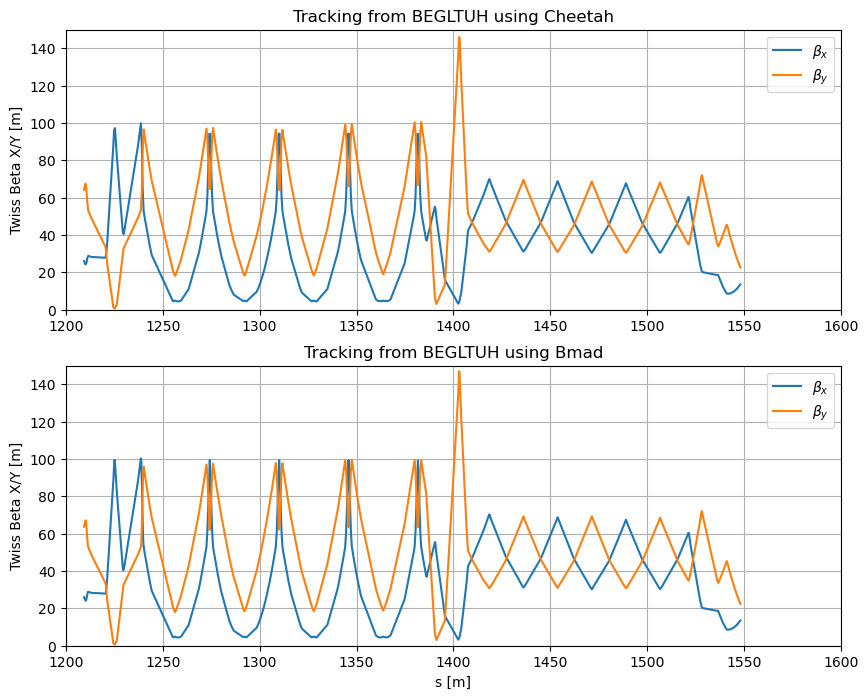

In [44]:
xlims = [1200, 1600]
ylims = [0,150]

track_start_element_name = track_start_element_name.strip().upper()

# Find Bmad start index
name_array = np.array([name.strip().upper() for name in bmad_output['ele.name']])
bmad_start_index = np.where(name_array == track_start_element_name)[0]

if len(bmad_start_index) == 0:
    raise ValueError(f"Element name '{track_start_element_name}' not found in Bmad output.")

bmad_start_s = bmad_output['ele.s'][bmad_start_index[0]]

s = cheetah_output['s']
cheetah_beta_x = cheetah_output['beta_x']
cheetah_beta_y = cheetah_output['beta_y']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  

# Plot Cheetah output
ax1.set_title(f'Tracking from {track_start_element_name} using Cheetah')
ax1.plot(s + bmad_start_s, cheetah_beta_x, label=r'$\beta_x$')
ax1.plot(s + bmad_start_s, cheetah_beta_y, label=r'$\beta_y$')
ax1.set_ylabel('Twiss Beta X/Y [m]')

if xlims:
    ax1.set_xlim(xlims)
if ylims:
    ax1.set_ylim(ylims)

ax1.grid()
ax1.legend()

# Plot Bmad output
ax2.set_title(f'Tracking from {track_start_element_name} using Bmad')
ax2.set_xlabel('s [m]')
ax2.set_ylabel('Twiss Beta X/Y [m]')
ax2.plot(bmad_output['ele.s'], bmad_output['ele.a.beta'], label=r'$\beta_x$')
ax2.plot(bmad_output['ele.s'], bmad_output['ele.b.beta'], label=r'$\beta_y$')

if xlims:
    ax2.set_xlim(xlims)
if ylims:
    ax2.set_ylim(ylims)

ax2.grid()
ax2.legend()

plt.show()

In [45]:
cheetah_alpha_x = cheetah_output['alpha_x']
cheetah_alpha_y = cheetah_output['alpha_y']

alpha_x=cheetah_alpha_x[-1]
alpha_y=cheetah_alpha_y[-1]
beta_x=cheetah_beta_x[-1]
beta_y=cheetah_beta_y[-1]




In [46]:
# define transformed model class
class TransformedModel(torch.nn.Module):
    def __init__(self, model, input_transformer, output_transformer):
        super(TransformedModel, self).__init__()
        self.model = model
        self.input_transformer = input_transformer
        self.output_transformer = output_transformer
    
    def forward(self, x):
        x = self.input_transformer(x)
        x = self.model(x)
        x = self.output_transformer.untransform(x)
        return x



In [47]:
import torch
import joblib
import numpy as np

# Load the full model

# load base model and transformers
model = torch.load("./model/FELmodel_model.pt")
inputs_to_nn = torch.load("./model/input_transform.pt")
outputs_to_nn = torch.load("./model/output_transform.pt")



# create transformed model
transformed_model = TransformedModel(
    model=model, 
    input_transformer=inputs_to_nn,
    output_transformer=outputs_to_nn,
).to(torch.double)
transformed_model

# Define your new inputs
alpha_x = cheetah_alpha_x[-1]
alpha_y = cheetah_alpha_y[-1]
beta_x = cheetah_beta_x[-1]
beta_y = cheetah_beta_y[-1]
taper = torch.tensor([0.03])  # Replace `your_taper_value` with the appropriate taper value
emit_x=torch.tensor([emittance_x]) 
emit_y=torch.tensor([emittance_y]) 
#taper = [0.0]  # Replace `your_taper_value` with the appropriate taper value
#emit_x=emittance_x
#emit_y=emittance_y  



# Correct the shape by removing the extra dimension
# Correct the shape by creating input_features as a 1D array (1, 7)
input_features = np.array([alpha_x, alpha_y, beta_x, beta_y, emit_x, emit_y, taper])#.reshape(1, 7)

# Convert to a 2D PyTorch tensor with the correct shape (1, 7)
input_tensor = torch.tensor([alpha_x, alpha_y, beta_x, beta_y, emit_x, emit_y, taper], dtype=torch.double)




# Make predictions using the model
with torch.no_grad():
    predicted_energy = transformed_model(input_tensor)


predicted_energy = predicted_energy.numpy()


# Print or return the predicted energy value
print(f'Predicted Energy: {predicted_energy[0]:.4f} μJ')


Predicted Energy: 26.5420 μJ
